In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [29]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BITAmin/Titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BITAmin/Titanic/test.csv')
gender_sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BITAmin/Titanic/gender_submission.csv')

## train.csv

|순번|변수|설명|
|---|---|---|
|1|PassengerId|승객 아이디|
|2|lSurvived|0 = 사망, 1 = 생존|
|3|Pclass|1 = 1등석, 2 = 2등석, 3 = 3등석|
|4|Sex|male = 남성, female = 여성|
|5|Age|나이|
|6|SibSp|타이타닉 호에 동승한 자매 / 배우자의 수|
|7|Parch|타이타닉 호에 동승한 부모 / 자식의 수|
|8|Fare|승객 요금|
|9|Cabin|방 호수|
|10|Embarked|탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴|

In [26]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [34]:
train.info()
# Dtype가 string인 열의 데이터들을 학습에 용이하게 형변환해주는 것이 좋아보임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
train.isnull().sum()
# 891행 중에서 Cabin 열은 687개의 행에서 결측치가 존재하므로 이 열을 삭제하는 것을 고려한다.
# Embarked 열은 결측치를 2개 소량으로 가지기 때문에 최빈값으로 대체해주는 것을 고려한다.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [65]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

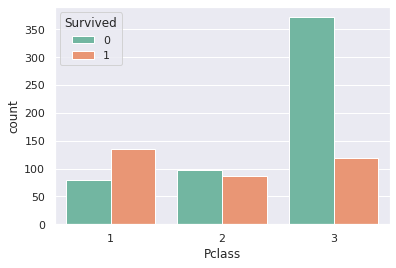

In [70]:
sns.countplot(data = train, x = 'Pclass', hue = 'Survived')

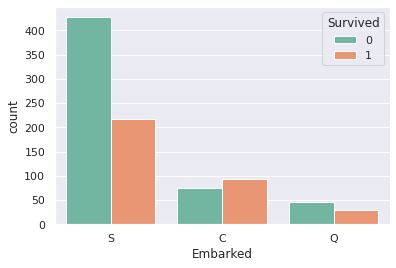

In [71]:
sns.countplot(data = train, x = 'Embarked', hue = 'Survived')

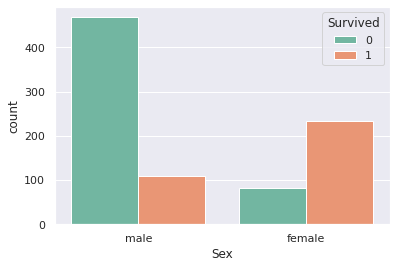

In [72]:
sns.countplot(data = train, x = 'Sex', hue = 'Survived')

In [58]:
def chart(dataset, feature):
    survived = dataset[dataset['Survived'] == 1][feature].value_counts()
    dead = dataset[dataset['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['survived', 'dead']
    df.plot(kind='bar', stacked=True)  

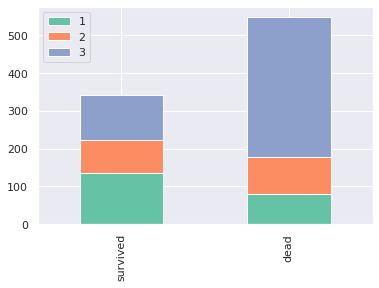

In [59]:
chart(train, 'Pclass')
# 3등석이 가장 많이 죽은 것을 알 수 있음

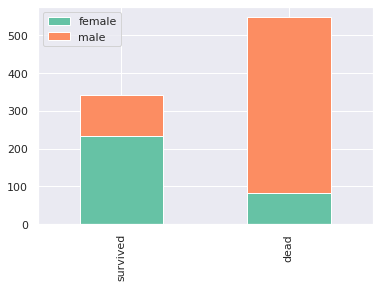

In [61]:
chart(train, 'Sex')
# 여성의 생존률이 더 높은 것을 알 수 있음

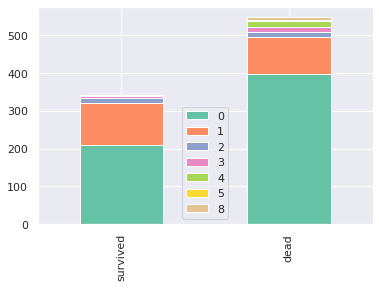

In [62]:
chart(train, 'SibSp')

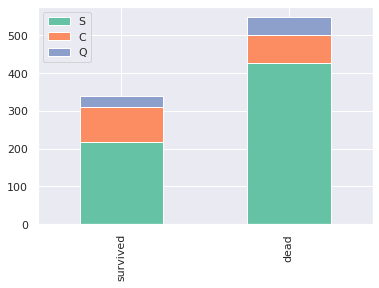

In [63]:
chart(train, 'Embarked')

In [74]:
#value_counts()를 통해 해당 열('embarked')의 최빈값 확인하기
#결측치를 해당열의 최빈값으로 대치
#print(train['Embarked'].value_counts())
#train['Embarked'].fillna('S')